In [1]:
import numpy as np
import os
import pickle
from IMDBModel import IMDBModel
from embedding import Embedding
from keras.preprocessing import sequence
import time
from glove_utils import load_embedding
from data_utils import IMDBDataset
from pprint import pprint
from attacker import Attacker
from explainers import SBE, LIMEExplainer
from pos_taggers import TextBlobTagger, SpacyTagger
from display_utils import html_render, display_html
from display_utils import AttackResult
import utils

Using TensorFlow backend.


In [2]:
%load_ext autoreload
%autoreload 2

### Load IMDB data

In [3]:
# Load data
maxlen = 200
batch_size = 32
print('Loading data...')
(train_text, x_train, y_train), (test_text, x_test, y_test) = IMDBDataset.load_data()
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, padding = 'pre', truncating = 'pre')
x_test = sequence.pad_sequences(x_test, maxlen=maxlen, padding = 'pre', truncating = 'pre')
print('Data loaded.')


Loading data...
Data loaded.


In [4]:
results_path = 'results/'

In [5]:
sbe_results_path = results_path + 'fasttext_threshold_0.5_sbe.pickle'
lime_results_path = results_path +  'fasttext_threshold_0.5_lime.pickle'
none_results_path = results_path + 'fasttext_threshold_0.5_none.pickle'
random_results_path = results_path + 'fasttext_threshold_0.5_random.pickle'

In [6]:
sbe_results_data = pickle.load(open(sbe_results_path, 'rb'))
lime_results_data = pickle.load(open(lime_results_path, 'rb'))
none_results_data = pickle.load(open(none_results_path, 'rb'))
random_results_data = pickle.load(open(random_results_path, 'rb'))

In [7]:
sbe_attack_result = AttackResult(sbe_results_data)
lime_attack_result = AttackResult(lime_results_data)
none_attack_result = AttackResult(none_results_data)
random_attack_result = AttackResult(random_results_data)

In [8]:
##### SBE
print("Using SBE as explainer: success_rate = %f , avg_nwords_changed = %f" % \
    (sbe_attack_result.get_success_rate(), sbe_attack_result.get_modification_percentage()))

##### LIME
print("Using LIME as explainer: success_rate = %f , avg_nwords_changed = %f" % \
    (lime_attack_result.get_success_rate(), lime_attack_result.get_modification_percentage()))

##### Using No explainer
print("Using no explainer: success_rate = %f , avg_nwords_changed = %f" % \
    (none_attack_result.get_success_rate(), none_attack_result.get_modification_percentage()))

#### Using random selection of words to perturb
print("Using random selection of words to perturb: success_rate = %f , avg_nwords_changed = %f" % \
    (random_attack_result.get_success_rate(), random_attack_result.get_modification_percentage()))

Using SBE as explainer: success_rate = 0.312000 , avg_nwords_changed = 0.062518
Using LIME as explainer: success_rate = 0.282000 , avg_nwords_changed = 0.059533
Using no explainer: success_rate = 0.552000 , avg_nwords_changed = 0.109432
Using random selection of words to perturb: success_rate = 0.036000 , avg_nwords_changed = 0.059227


In [21]:
sbe_attack_result.visualize_attack(100, show_successful_only = True) # attack that use SBE as explainer to target words

#0   index = 6488
ATTACK FAILED
--------------------------------------------------
#1   index = 10198
ATTACK FAILED
--------------------------------------------------
#2   index = 18059
ATTACK FAILED
--------------------------------------------------
#3   index = 4677
ATTACK FAILED
--------------------------------------------------
#4   index = 14570
ATTACK FAILED
--------------------------------------------------
#5   index = 15129
ATTACK FAILED
--------------------------------------------------
#6   index = 16713
ATTACK FAILED
--------------------------------------------------
#7   index = 2769
ATTACK FAILED
--------------------------------------------------
#8   index = 24147
ATTACK FAILED
--------------------------------------------------
#9   index = 14944
ATTACK SUCCEEDED
Original prediction: 0.008080



New prediction: 0.602268


--------------------------------------------------
#10   index = 16582
ATTACK SUCCEEDED
Original prediction: 0.007944



New prediction: 0.518907


--------------------------------------------------
#11   index = 14167
ATTACK FAILED
--------------------------------------------------
#12   index = 12293
ATTACK FAILED
--------------------------------------------------
#13   index = 18299
ATTACK FAILED
--------------------------------------------------
#14   index = 6206
ATTACK FAILED
--------------------------------------------------
#15   index = 1948
ATTACK FAILED
--------------------------------------------------
#16   index = 9360
ATTACK FAILED
--------------------------------------------------
#17   index = 2803
ATTACK FAILED
--------------------------------------------------
#18   index = 1267
ATTACK FAILED
--------------------------------------------------
#19   index = 12820
ATTACK FAILED
--------------------------------------------------
#20   index = 10153
ATTACK SUCCEEDED
Original prediction: 0.976192



New prediction: 0.424373


--------------------------------------------------
#21   index = 23856
ATTACK FAILED
--------------------------------------------------
#22   index = 20050
ATTACK FAILED
--------------------------------------------------
#23   index = 16027
ATTACK SUCCEEDED
Original prediction: 0.007446



New prediction: 0.626428


--------------------------------------------------
#24   index = 6521
ATTACK FAILED
--------------------------------------------------
#25   index = 24779
ATTACK FAILED
--------------------------------------------------
#26   index = 12703
ATTACK SUCCEEDED
Original prediction: 0.072912



New prediction: 0.510999


--------------------------------------------------
#27   index = 401
ATTACK FAILED
--------------------------------------------------
#28   index = 8335
ATTACK FAILED
--------------------------------------------------
#29   index = 13638
ATTACK FAILED
--------------------------------------------------
#30   index = 6730
ATTACK FAILED
--------------------------------------------------
#31   index = 24639
ATTACK FAILED
--------------------------------------------------
#32   index = 9897
ATTACK SUCCEEDED
Original prediction: 0.945216



New prediction: 0.494870


--------------------------------------------------
#33   index = 22135
ATTACK FAILED
--------------------------------------------------
#34   index = 13051
ATTACK FAILED
--------------------------------------------------
#35   index = 16964
ATTACK FAILED
--------------------------------------------------
#36   index = 19933
ATTACK FAILED
--------------------------------------------------
#37   index = 11457
ATTACK FAILED
--------------------------------------------------
#38   index = 22621
ATTACK FAILED
--------------------------------------------------
#39   index = 7398
ATTACK FAILED
--------------------------------------------------
#40   index = 16739
ATTACK SUCCEEDED
Original prediction: 0.088082



New prediction: 0.506016


--------------------------------------------------
#41   index = 24549
ATTACK SUCCEEDED
Original prediction: 0.064209



New prediction: 0.505326


--------------------------------------------------
#42   index = 15502
ATTACK SUCCEEDED
Original prediction: 0.027711



New prediction: 0.596006


--------------------------------------------------
#43   index = 21471
ATTACK FAILED
--------------------------------------------------
#44   index = 22326
ATTACK FAILED
--------------------------------------------------
#45   index = 18093
ATTACK FAILED
--------------------------------------------------
#46   index = 2262
ATTACK SUCCEEDED
Original prediction: 0.963770



New prediction: 0.394364


--------------------------------------------------
#47   index = 4714
ATTACK FAILED
--------------------------------------------------
#48   index = 24689
ATTACK SUCCEEDED
Original prediction: 0.018290



New prediction: 0.768845


--------------------------------------------------
#49   index = 18012
ATTACK FAILED
--------------------------------------------------
#50   index = 14018
ATTACK FAILED
--------------------------------------------------
#51   index = 1576
ATTACK FAILED
--------------------------------------------------
#52   index = 3462
ATTACK FAILED
--------------------------------------------------
#53   index = 230
ATTACK FAILED
--------------------------------------------------
#54   index = 2428
ATTACK FAILED
--------------------------------------------------
#55   index = 20843
ATTACK FAILED
--------------------------------------------------
#56   index = 7766
ATTACK FAILED
--------------------------------------------------
#57   index = 9962
ATTACK SUCCEEDED
Original prediction: 0.915301



New prediction: 0.484764


--------------------------------------------------
#58   index = 3692
ATTACK FAILED
--------------------------------------------------
#59   index = 7271
ATTACK FAILED
--------------------------------------------------
#60   index = 15780
ATTACK FAILED
--------------------------------------------------
#61   index = 11371
ATTACK FAILED
--------------------------------------------------
#62   index = 1707
ATTACK FAILED
--------------------------------------------------
#63   index = 23296
ATTACK FAILED
--------------------------------------------------
#64   index = 13946
ATTACK FAILED
--------------------------------------------------
#65   index = 10688
ATTACK FAILED
--------------------------------------------------
#66   index = 1465
ATTACK FAILED
--------------------------------------------------
#67   index = 18936
ATTACK FAILED
--------------------------------------------------
#68   index = 21283
ATTACK SUCCEEDED
Original prediction: 0.043199



New prediction: 0.537714


--------------------------------------------------
#69   index = 2213
ATTACK SUCCEEDED
Original prediction: 0.921771



New prediction: 0.337476


--------------------------------------------------
#70   index = 9317
ATTACK FAILED
--------------------------------------------------
#71   index = 12204
ATTACK SUCCEEDED
Original prediction: 0.991613



New prediction: 0.463695


--------------------------------------------------
#72   index = 19911
ATTACK FAILED
--------------------------------------------------
#73   index = 14203
ATTACK FAILED
--------------------------------------------------
#74   index = 16250
ATTACK FAILED
--------------------------------------------------
#75   index = 15467
ATTACK FAILED
--------------------------------------------------
#76   index = 3132
ATTACK FAILED
--------------------------------------------------
#77   index = 16773
ATTACK SUCCEEDED
Original prediction: 0.007567



New prediction: 0.520003


--------------------------------------------------
#78   index = 17480
ATTACK FAILED
--------------------------------------------------
#79   index = 9040
ATTACK FAILED
--------------------------------------------------
#80   index = 17335
ATTACK FAILED
--------------------------------------------------
#81   index = 4516
ATTACK FAILED
--------------------------------------------------
#82   index = 621
ATTACK SUCCEEDED
Original prediction: 0.998724



New prediction: 0.392899


--------------------------------------------------
#83   index = 17199
ATTACK SUCCEEDED
Original prediction: 0.026673



New prediction: 0.532986


--------------------------------------------------
#84   index = 5215
ATTACK SUCCEEDED
Original prediction: 0.921137



New prediction: 0.458346


--------------------------------------------------
#85   index = 18240
ATTACK FAILED
--------------------------------------------------
#86   index = 4305
ATTACK FAILED
--------------------------------------------------
#87   index = 15995
ATTACK SUCCEEDED
Original prediction: 0.017540



New prediction: 0.524570


--------------------------------------------------
#88   index = 19527
ATTACK FAILED
--------------------------------------------------
#89   index = 16501
ATTACK FAILED
--------------------------------------------------
#90   index = 12988
ATTACK FAILED
--------------------------------------------------
#91   index = 622
ATTACK FAILED
--------------------------------------------------
#92   index = 23761
ATTACK FAILED
--------------------------------------------------
#93   index = 24886
ATTACK FAILED
--------------------------------------------------
#94   index = 2096
ATTACK SUCCEEDED
Original prediction: 0.958321



New prediction: 0.414907


--------------------------------------------------
#95   index = 20300
ATTACK FAILED
--------------------------------------------------
#96   index = 21183
ATTACK FAILED
--------------------------------------------------
#97   index = 4010
ATTACK SUCCEEDED
Original prediction: 0.991664



New prediction: 0.477579


--------------------------------------------------
#98   index = 8774
ATTACK FAILED
--------------------------------------------------
#99   index = 2860
ATTACK FAILED
--------------------------------------------------


In [12]:
none_attack_result.visualize_attack(500, show_successful_only = True) # attack that runs greedy search on all words in the text

#0   index = 6488
ATTACK SUCCEEDED
Original prediction: 0.908488



New prediction: 0.495943


--------------------------------------------------
#1   index = 10198
ATTACK SUCCEEDED
Original prediction: 0.998615



New prediction: 0.435450


--------------------------------------------------
#2   index = 18059
ATTACK SUCCEEDED
Original prediction: 0.003709



New prediction: 0.520301


--------------------------------------------------
#3   index = 4677
ATTACK SUCCEEDED
Original prediction: 0.943790



New prediction: 0.475589


--------------------------------------------------
#4   index = 14570
ATTACK FAILED
--------------------------------------------------
#5   index = 15129
ATTACK FAILED
--------------------------------------------------
#6   index = 16713
ATTACK SUCCEEDED
Original prediction: 0.012003



New prediction: 0.512837


--------------------------------------------------
#7   index = 2769
ATTACK SUCCEEDED
Original prediction: 0.987838



New prediction: 0.388679


--------------------------------------------------
#8   index = 24147
ATTACK FAILED
--------------------------------------------------
#9   index = 14944
ATTACK SUCCEEDED
Original prediction: 0.008080



New prediction: 0.602268


--------------------------------------------------
#10   index = 16582
ATTACK SUCCEEDED
Original prediction: 0.007944



New prediction: 0.504931


--------------------------------------------------
#11   index = 14167
ATTACK FAILED
--------------------------------------------------
#12   index = 12293
ATTACK FAILED
--------------------------------------------------
#13   index = 18299
ATTACK FAILED
--------------------------------------------------
#14   index = 6206
ATTACK SUCCEEDED
Original prediction: 0.976515



New prediction: 0.439184


--------------------------------------------------
#15   index = 1948
ATTACK FAILED
--------------------------------------------------
#16   index = 9360
ATTACK FAILED
--------------------------------------------------
#17   index = 2803
ATTACK SUCCEEDED
Original prediction: 0.987681



New prediction: 0.482443


--------------------------------------------------
#18   index = 1267
ATTACK FAILED
--------------------------------------------------
#19   index = 12820
ATTACK FAILED
--------------------------------------------------
#20   index = 10153
ATTACK SUCCEEDED
Original prediction: 0.976192



New prediction: 0.151249


--------------------------------------------------
#21   index = 23856
ATTACK FAILED
--------------------------------------------------
#22   index = 20050
ATTACK FAILED
--------------------------------------------------
#23   index = 16027
ATTACK SUCCEEDED
Original prediction: 0.007446



New prediction: 0.699249


--------------------------------------------------
#24   index = 6521
ATTACK FAILED
--------------------------------------------------
#25   index = 24779
ATTACK SUCCEEDED
Original prediction: 0.009149



New prediction: 0.518619


--------------------------------------------------
#26   index = 12703
ATTACK SUCCEEDED
Original prediction: 0.072912



New prediction: 0.528856


--------------------------------------------------
#27   index = 401
ATTACK FAILED
--------------------------------------------------
#28   index = 8335
ATTACK SUCCEEDED
Original prediction: 0.996806



New prediction: 0.491455


--------------------------------------------------
#29   index = 13638
ATTACK FAILED
--------------------------------------------------
#30   index = 6730
ATTACK SUCCEEDED
Original prediction: 0.987464



New prediction: 0.216882


--------------------------------------------------
#31   index = 24639
ATTACK FAILED
--------------------------------------------------
#32   index = 9897
ATTACK SUCCEEDED
Original prediction: 0.945216



New prediction: 0.415905


--------------------------------------------------
#33   index = 22135
ATTACK SUCCEEDED
Original prediction: 0.041188



New prediction: 0.536079


--------------------------------------------------
#34   index = 13051
ATTACK FAILED
--------------------------------------------------
#35   index = 16964
ATTACK FAILED
--------------------------------------------------
#36   index = 19933
ATTACK SUCCEEDED
Original prediction: 0.031736



New prediction: 0.533665


--------------------------------------------------
#37   index = 11457
ATTACK SUCCEEDED
Original prediction: 0.993375



New prediction: 0.492086


--------------------------------------------------
#38   index = 22621
ATTACK FAILED
--------------------------------------------------
#39   index = 7398
ATTACK FAILED
--------------------------------------------------
#40   index = 16739
ATTACK SUCCEEDED
Original prediction: 0.088082



New prediction: 0.516198


--------------------------------------------------
#41   index = 24549
ATTACK SUCCEEDED
Original prediction: 0.064209



New prediction: 0.516942


--------------------------------------------------
#42   index = 15502
ATTACK SUCCEEDED
Original prediction: 0.027711



New prediction: 0.596006


--------------------------------------------------
#43   index = 21471
ATTACK FAILED
--------------------------------------------------
#44   index = 22326
ATTACK FAILED
--------------------------------------------------
#45   index = 18093
ATTACK SUCCEEDED
Original prediction: 0.074825



New prediction: 0.600060


--------------------------------------------------
#46   index = 2262
ATTACK SUCCEEDED
Original prediction: 0.963770



New prediction: 0.437463


--------------------------------------------------
#47   index = 4714
ATTACK SUCCEEDED
Original prediction: 0.910452



New prediction: 0.466516


--------------------------------------------------
#48   index = 24689
ATTACK SUCCEEDED
Original prediction: 0.018290



New prediction: 0.536183


--------------------------------------------------
#49   index = 18012
ATTACK FAILED
--------------------------------------------------
#50   index = 14018
ATTACK FAILED
--------------------------------------------------
#51   index = 1576
ATTACK FAILED
--------------------------------------------------
#52   index = 3462
ATTACK SUCCEEDED
Original prediction: 0.978491



New prediction: 0.494078


--------------------------------------------------
#53   index = 230
ATTACK FAILED
--------------------------------------------------
#54   index = 2428
ATTACK SUCCEEDED
Original prediction: 0.993096



New prediction: 0.484553


--------------------------------------------------
#55   index = 20843
ATTACK FAILED
--------------------------------------------------
#56   index = 7766
ATTACK FAILED
--------------------------------------------------
#57   index = 9962
ATTACK SUCCEEDED
Original prediction: 0.915301



New prediction: 0.484764


--------------------------------------------------
#58   index = 3692
ATTACK SUCCEEDED
Original prediction: 0.993906



New prediction: 0.436640


--------------------------------------------------
#59   index = 7271
ATTACK SUCCEEDED
Original prediction: 0.992867



New prediction: 0.491906


--------------------------------------------------
#60   index = 15780
ATTACK FAILED
--------------------------------------------------
#61   index = 11371
ATTACK SUCCEEDED
Original prediction: 0.932333



New prediction: 0.475593


--------------------------------------------------
#62   index = 1707
ATTACK SUCCEEDED
Original prediction: 0.994999



New prediction: 0.486135


--------------------------------------------------
#63   index = 23296
ATTACK FAILED
--------------------------------------------------
#64   index = 13946
ATTACK FAILED
--------------------------------------------------
#65   index = 10688
ATTACK SUCCEEDED
Original prediction: 0.973982



New prediction: 0.485241


--------------------------------------------------
#66   index = 1465
ATTACK FAILED
--------------------------------------------------
#67   index = 18936
ATTACK SUCCEEDED
Original prediction: 0.033213



New prediction: 0.512042


--------------------------------------------------
#68   index = 21283
ATTACK SUCCEEDED
Original prediction: 0.043199



New prediction: 0.537714


--------------------------------------------------
#69   index = 2213
ATTACK SUCCEEDED
Original prediction: 0.921771



New prediction: 0.337476


--------------------------------------------------
#70   index = 9317
ATTACK FAILED
--------------------------------------------------
#71   index = 12204
ATTACK SUCCEEDED
Original prediction: 0.991613



New prediction: 0.482780


--------------------------------------------------
#72   index = 19911
ATTACK FAILED
--------------------------------------------------
#73   index = 14203
ATTACK FAILED
--------------------------------------------------
#74   index = 16250
ATTACK FAILED
--------------------------------------------------
#75   index = 15467
ATTACK FAILED
--------------------------------------------------
#76   index = 3132
ATTACK SUCCEEDED
Original prediction: 0.996533



New prediction: 0.213146


--------------------------------------------------
#77   index = 16773
ATTACK SUCCEEDED
Original prediction: 0.007567



New prediction: 0.516366


--------------------------------------------------
#78   index = 17480
ATTACK SUCCEEDED
Original prediction: 0.051020



New prediction: 0.539880


--------------------------------------------------
#79   index = 9040
ATTACK FAILED
--------------------------------------------------
#80   index = 17335
ATTACK FAILED
--------------------------------------------------
#81   index = 4516
ATTACK SUCCEEDED
Original prediction: 0.984769



New prediction: 0.479584


--------------------------------------------------
#82   index = 621
ATTACK SUCCEEDED
Original prediction: 0.998724



New prediction: 0.362371


--------------------------------------------------
#83   index = 17199
ATTACK SUCCEEDED
Original prediction: 0.026673



New prediction: 0.526379


--------------------------------------------------
#84   index = 5215
ATTACK SUCCEEDED
Original prediction: 0.921137



New prediction: 0.426086


--------------------------------------------------
#85   index = 18240
ATTACK FAILED
--------------------------------------------------
#86   index = 4305
ATTACK SUCCEEDED
Original prediction: 0.980812



New prediction: 0.464202


--------------------------------------------------
#87   index = 15995
ATTACK SUCCEEDED
Original prediction: 0.017540



New prediction: 0.538915


--------------------------------------------------
#88   index = 19527
ATTACK FAILED
--------------------------------------------------
#89   index = 16501
ATTACK FAILED
--------------------------------------------------
#90   index = 12988
ATTACK FAILED
--------------------------------------------------
#91   index = 622
ATTACK FAILED
--------------------------------------------------
#92   index = 23761
ATTACK FAILED
--------------------------------------------------
#93   index = 24886
ATTACK FAILED
--------------------------------------------------
#94   index = 2096
ATTACK SUCCEEDED
Original prediction: 0.958321



New prediction: 0.414907


--------------------------------------------------
#95   index = 20300
ATTACK FAILED
--------------------------------------------------
#96   index = 21183
ATTACK FAILED
--------------------------------------------------
#97   index = 4010
ATTACK SUCCEEDED
Original prediction: 0.991664



New prediction: 0.449267


--------------------------------------------------
#98   index = 8774
ATTACK FAILED
--------------------------------------------------
#99   index = 2860
ATTACK SUCCEEDED
Original prediction: 0.983982



New prediction: 0.496302


--------------------------------------------------
#100   index = 22935
ATTACK FAILED
--------------------------------------------------
#101   index = 19373
ATTACK FAILED
--------------------------------------------------
#102   index = 16093
ATTACK FAILED
--------------------------------------------------
#103   index = 11461
ATTACK SUCCEEDED
Original prediction: 0.951975



New prediction: 0.497946


--------------------------------------------------
#104   index = 20481
ATTACK FAILED
--------------------------------------------------
#105   index = 13553
ATTACK FAILED
--------------------------------------------------
#106   index = 2439
ATTACK FAILED
--------------------------------------------------
#107   index = 22738
ATTACK FAILED
--------------------------------------------------
#108   index = 17060
ATTACK SUCCEEDED
Original prediction: 0.024241



New prediction: 0.508458


--------------------------------------------------
#109   index = 4003
ATTACK SUCCEEDED
Original prediction: 0.937390



New prediction: 0.408786


--------------------------------------------------
#110   index = 1041
ATTACK SUCCEEDED
Original prediction: 0.972476



New prediction: 0.382176


--------------------------------------------------
#111   index = 11796
ATTACK SUCCEEDED
Original prediction: 0.996257



New prediction: 0.492472


--------------------------------------------------
#112   index = 3061
ATTACK FAILED
--------------------------------------------------
#113   index = 7844
ATTACK SUCCEEDED
Original prediction: 0.996461



New prediction: 0.478037


--------------------------------------------------
#114   index = 11884
ATTACK FAILED
--------------------------------------------------
#115   index = 12487
ATTACK SUCCEEDED
Original prediction: 0.995595



New prediction: 0.494015


--------------------------------------------------
#116   index = 18368
ATTACK FAILED
--------------------------------------------------
#117   index = 12735
ATTACK SUCCEEDED
Original prediction: 0.008015



New prediction: 0.502971


--------------------------------------------------
#118   index = 6168
ATTACK FAILED
--------------------------------------------------
#119   index = 3632
ATTACK SUCCEEDED
Original prediction: 0.985659



New prediction: 0.482026


--------------------------------------------------
#120   index = 965
ATTACK SUCCEEDED
Original prediction: 0.999688



New prediction: 0.477166


--------------------------------------------------
#121   index = 13451
ATTACK SUCCEEDED
Original prediction: 0.069167



New prediction: 0.501885


--------------------------------------------------
#122   index = 3751
ATTACK FAILED
--------------------------------------------------
#123   index = 7181
ATTACK SUCCEEDED
Original prediction: 0.982663



New prediction: 0.464116


--------------------------------------------------
#124   index = 16429
ATTACK SUCCEEDED
Original prediction: 0.005999



New prediction: 0.550131


--------------------------------------------------
#125   index = 13229
ATTACK SUCCEEDED
Original prediction: 0.003738



New prediction: 0.511871


--------------------------------------------------
#126   index = 23429
ATTACK FAILED
--------------------------------------------------
#127   index = 15930
ATTACK FAILED
--------------------------------------------------
#128   index = 12405
ATTACK FAILED
--------------------------------------------------
#129   index = 12160
ATTACK SUCCEEDED
Original prediction: 0.949246



New prediction: 0.393879


--------------------------------------------------
#130   index = 9619
ATTACK FAILED
--------------------------------------------------
#131   index = 5247
ATTACK FAILED
--------------------------------------------------
#132   index = 14436
ATTACK FAILED
--------------------------------------------------
#133   index = 21143
ATTACK FAILED
--------------------------------------------------
#134   index = 15428
ATTACK FAILED
--------------------------------------------------
#135   index = 21521
ATTACK FAILED
--------------------------------------------------
#136   index = 11991
ATTACK SUCCEEDED
Original prediction: 0.948582



New prediction: 0.473413


--------------------------------------------------
#137   index = 17325
ATTACK FAILED
--------------------------------------------------
#138   index = 13343
ATTACK SUCCEEDED
Original prediction: 0.002703



New prediction: 0.547217


--------------------------------------------------
#139   index = 17052
ATTACK FAILED
--------------------------------------------------
#140   index = 10895
ATTACK SUCCEEDED
Original prediction: 0.918375



New prediction: 0.434240


--------------------------------------------------
#141   index = 22525
ATTACK SUCCEEDED
Original prediction: 0.006340



New prediction: 0.723003


--------------------------------------------------
#142   index = 11005
ATTACK SUCCEEDED
Original prediction: 0.979172



New prediction: 0.487309


--------------------------------------------------
#143   index = 7366
ATTACK SUCCEEDED
Original prediction: 0.984133



New prediction: 0.452982


--------------------------------------------------
#144   index = 17224
ATTACK FAILED
--------------------------------------------------
#145   index = 20312
ATTACK FAILED
--------------------------------------------------
#146   index = 5155
ATTACK SUCCEEDED
Original prediction: 0.994170



New prediction: 0.473657


--------------------------------------------------
#147   index = 19287
ATTACK FAILED
--------------------------------------------------
#148   index = 22967
ATTACK FAILED
--------------------------------------------------
#149   index = 8570
ATTACK SUCCEEDED
Original prediction: 0.970711



New prediction: 0.473113


--------------------------------------------------
#150   index = 17222
ATTACK FAILED
--------------------------------------------------
#151   index = 13223
ATTACK SUCCEEDED
Original prediction: 0.011457



New prediction: 0.527616


--------------------------------------------------
#152   index = 6158
ATTACK SUCCEEDED
Original prediction: 0.995791



New prediction: 0.479931


--------------------------------------------------
#153   index = 19656
ATTACK FAILED
--------------------------------------------------
#154   index = 7894
ATTACK SUCCEEDED
Original prediction: 0.941310



New prediction: 0.475807


--------------------------------------------------
#155   index = 3191
ATTACK FAILED
--------------------------------------------------
#156   index = 20198
ATTACK SUCCEEDED
Original prediction: 0.001819



New prediction: 0.507114


--------------------------------------------------
#157   index = 5898
ATTACK SUCCEEDED
Original prediction: 0.985511



New prediction: 0.426776


--------------------------------------------------
#158   index = 14526
ATTACK FAILED
--------------------------------------------------
#159   index = 15672
ATTACK FAILED
--------------------------------------------------
#160   index = 18887
ATTACK FAILED
--------------------------------------------------
#161   index = 24315
ATTACK FAILED
--------------------------------------------------
#162   index = 4974
ATTACK SUCCEEDED
Original prediction: 0.933800



New prediction: 0.349162


--------------------------------------------------
#163   index = 13072
ATTACK FAILED
--------------------------------------------------
#164   index = 23180
ATTACK FAILED
--------------------------------------------------
#165   index = 23311
ATTACK FAILED
--------------------------------------------------
#166   index = 7752
ATTACK FAILED
--------------------------------------------------
#167   index = 3417
ATTACK SUCCEEDED
Original prediction: 0.991041



New prediction: 0.437767


--------------------------------------------------
#168   index = 4728
ATTACK SUCCEEDED
Original prediction: 0.907339



New prediction: 0.462364


--------------------------------------------------
#169   index = 10123
ATTACK SUCCEEDED
Original prediction: 0.991965



New prediction: 0.486095


--------------------------------------------------
#170   index = 3294
ATTACK FAILED
--------------------------------------------------
#171   index = 24898
ATTACK SUCCEEDED
Original prediction: 0.027415



New prediction: 0.550793


--------------------------------------------------
#172   index = 16141
ATTACK SUCCEEDED
Original prediction: 0.041346



New prediction: 0.895656


--------------------------------------------------
#173   index = 2266
ATTACK SUCCEEDED
Original prediction: 0.992588



New prediction: 0.461052


--------------------------------------------------
#174   index = 21856
ATTACK SUCCEEDED
Original prediction: 0.025124



New prediction: 0.654836


--------------------------------------------------
#175   index = 12106
ATTACK SUCCEEDED
Original prediction: 0.991616



New prediction: 0.474857


--------------------------------------------------
#176   index = 24199
ATTACK SUCCEEDED
Original prediction: 0.004894



New prediction: 0.522728


--------------------------------------------------
#177   index = 14589
ATTACK FAILED
--------------------------------------------------
#178   index = 5089
ATTACK FAILED
--------------------------------------------------
#179   index = 13437
ATTACK SUCCEEDED
Original prediction: 0.060052



New prediction: 0.511882


--------------------------------------------------
#180   index = 19924
ATTACK FAILED
--------------------------------------------------
#181   index = 15149
ATTACK FAILED
--------------------------------------------------
#182   index = 2912
ATTACK SUCCEEDED
Original prediction: 0.984860



New prediction: 0.487011


--------------------------------------------------
#183   index = 22965
ATTACK FAILED
--------------------------------------------------
#184   index = 16889
ATTACK SUCCEEDED
Original prediction: 0.002196



New prediction: 0.526343


--------------------------------------------------
#185   index = 6113
ATTACK SUCCEEDED
Original prediction: 0.994354



New prediction: 0.487129


--------------------------------------------------
#186   index = 18395
ATTACK SUCCEEDED
Original prediction: 0.004247



New prediction: 0.579192


--------------------------------------------------
#187   index = 11321
ATTACK SUCCEEDED
Original prediction: 0.961874



New prediction: 0.448028


--------------------------------------------------
#188   index = 2819
ATTACK SUCCEEDED
Original prediction: 0.981883



New prediction: 0.480524


--------------------------------------------------
#189   index = 9420
ATTACK SUCCEEDED
Original prediction: 0.989875



New prediction: 0.465520


--------------------------------------------------
#190   index = 15936
ATTACK SUCCEEDED
Original prediction: 0.006250



New prediction: 0.546215


--------------------------------------------------
#191   index = 16580
ATTACK FAILED
--------------------------------------------------
#192   index = 23833
ATTACK SUCCEEDED
Original prediction: 0.037487



New prediction: 0.605921


--------------------------------------------------
#193   index = 9909
ATTACK FAILED
--------------------------------------------------
#194   index = 22792
ATTACK SUCCEEDED
Original prediction: 0.011745



New prediction: 0.709145


--------------------------------------------------
#195   index = 22246
ATTACK FAILED
--------------------------------------------------
#196   index = 4567
ATTACK SUCCEEDED
Original prediction: 0.998553



New prediction: 0.487714


--------------------------------------------------
#197   index = 11508
ATTACK SUCCEEDED
Original prediction: 0.977963



New prediction: 0.482056


--------------------------------------------------
#198   index = 18376
ATTACK SUCCEEDED
Original prediction: 0.005447



New prediction: 0.509972


--------------------------------------------------
#199   index = 16808
ATTACK SUCCEEDED
Original prediction: 0.089611



New prediction: 0.505166


--------------------------------------------------
#200   index = 9090
ATTACK SUCCEEDED
Original prediction: 0.966898



New prediction: 0.468260


--------------------------------------------------
#201   index = 18720
ATTACK FAILED
--------------------------------------------------
#202   index = 11680
ATTACK SUCCEEDED
Original prediction: 0.976457



New prediction: 0.416702


--------------------------------------------------
#203   index = 955
ATTACK SUCCEEDED
Original prediction: 0.951258



New prediction: 0.487477


--------------------------------------------------
#204   index = 20122
ATTACK SUCCEEDED
Original prediction: 0.069701



New prediction: 0.514995


--------------------------------------------------
#205   index = 16940
ATTACK SUCCEEDED
Original prediction: 0.021879



New prediction: 0.546494


--------------------------------------------------
#206   index = 21301
ATTACK FAILED
--------------------------------------------------
#207   index = 18110
ATTACK FAILED
--------------------------------------------------
#208   index = 14856
ATTACK FAILED
--------------------------------------------------
#209   index = 6355
ATTACK FAILED
--------------------------------------------------
#210   index = 11883
ATTACK FAILED
--------------------------------------------------
#211   index = 8771
ATTACK SUCCEEDED
Original prediction: 0.955251



New prediction: 0.366365


--------------------------------------------------
#212   index = 831
ATTACK FAILED
--------------------------------------------------
#213   index = 19070
ATTACK SUCCEEDED
Original prediction: 0.004602



New prediction: 0.576916


--------------------------------------------------
#214   index = 15531
ATTACK SUCCEEDED
Original prediction: 0.009137



New prediction: 0.519164


--------------------------------------------------
#215   index = 5507
ATTACK SUCCEEDED
Original prediction: 0.953885



New prediction: 0.455713


--------------------------------------------------
#216   index = 2751
ATTACK FAILED
--------------------------------------------------
#217   index = 1133
ATTACK SUCCEEDED
Original prediction: 0.996285



New prediction: 0.462884


--------------------------------------------------
#218   index = 15725
ATTACK SUCCEEDED
Original prediction: 0.001591



New prediction: 0.564277


--------------------------------------------------
#219   index = 6169
ATTACK SUCCEEDED
Original prediction: 0.933905



New prediction: 0.438613


--------------------------------------------------
#220   index = 15176
ATTACK FAILED
--------------------------------------------------
#221   index = 10075
ATTACK SUCCEEDED
Original prediction: 0.970773



New prediction: 0.445486


--------------------------------------------------
#222   index = 14661
ATTACK SUCCEEDED
Original prediction: 0.025398



New prediction: 0.601379


--------------------------------------------------
#223   index = 2463
ATTACK FAILED
--------------------------------------------------
#224   index = 16414
ATTACK FAILED
--------------------------------------------------
#225   index = 8337
ATTACK SUCCEEDED
Original prediction: 0.986984



New prediction: 0.450884


--------------------------------------------------
#226   index = 9192
ATTACK SUCCEEDED
Original prediction: 0.954247



New prediction: 0.470875


--------------------------------------------------
#227   index = 8310
ATTACK SUCCEEDED
Original prediction: 0.996254



New prediction: 0.472398


--------------------------------------------------
#228   index = 9394
ATTACK SUCCEEDED
Original prediction: 0.935307



New prediction: 0.436848


--------------------------------------------------
#229   index = 21639
ATTACK FAILED
--------------------------------------------------
#230   index = 12182
ATTACK SUCCEEDED
Original prediction: 0.996086



New prediction: 0.499917


--------------------------------------------------
#231   index = 10966
ATTACK SUCCEEDED
Original prediction: 0.999867



New prediction: 0.483027


--------------------------------------------------
#232   index = 22529
ATTACK FAILED
--------------------------------------------------
#233   index = 888
ATTACK SUCCEEDED
Original prediction: 0.955341



New prediction: 0.463192


--------------------------------------------------
#234   index = 3282
ATTACK FAILED
--------------------------------------------------
#235   index = 13426
ATTACK SUCCEEDED
Original prediction: 0.029777



New prediction: 0.611297


--------------------------------------------------
#236   index = 17785
ATTACK FAILED
--------------------------------------------------
#237   index = 21838
ATTACK FAILED
--------------------------------------------------
#238   index = 18086
ATTACK FAILED
--------------------------------------------------
#239   index = 10816
ATTACK SUCCEEDED
Original prediction: 0.994336



New prediction: 0.401153


--------------------------------------------------
#240   index = 24053
ATTACK SUCCEEDED
Original prediction: 0.011306



New prediction: 0.507991


--------------------------------------------------
#241   index = 12144
ATTACK FAILED
--------------------------------------------------
#242   index = 13411
ATTACK FAILED
--------------------------------------------------
#243   index = 7135
ATTACK SUCCEEDED
Original prediction: 0.962877



New prediction: 0.375443


--------------------------------------------------
#244   index = 17966
ATTACK FAILED
--------------------------------------------------
#245   index = 18741
ATTACK FAILED
--------------------------------------------------
#246   index = 21032
ATTACK SUCCEEDED
Original prediction: 0.042441



New prediction: 0.525912


--------------------------------------------------
#247   index = 20287
ATTACK FAILED
--------------------------------------------------
#248   index = 16073
ATTACK SUCCEEDED
Original prediction: 0.081330



New prediction: 0.585082


--------------------------------------------------
#249   index = 3298
ATTACK FAILED
--------------------------------------------------
#250   index = 13838
ATTACK FAILED
--------------------------------------------------
#251   index = 3302
ATTACK FAILED
--------------------------------------------------
#252   index = 23859
ATTACK SUCCEEDED
Original prediction: 0.021282



New prediction: 0.589578


--------------------------------------------------
#253   index = 21478
ATTACK SUCCEEDED
Original prediction: 0.091486



New prediction: 0.522433


--------------------------------------------------
#254   index = 16926
ATTACK FAILED
--------------------------------------------------
#255   index = 19096
ATTACK SUCCEEDED
Original prediction: 0.044509



New prediction: 0.528920


--------------------------------------------------
#256   index = 14520
ATTACK SUCCEEDED
Original prediction: 0.002030



New prediction: 0.583277


--------------------------------------------------
#257   index = 2131
ATTACK SUCCEEDED
Original prediction: 0.999398



New prediction: 0.485011


--------------------------------------------------
#258   index = 8109
ATTACK SUCCEEDED
Original prediction: 0.975998



New prediction: 0.491417


--------------------------------------------------
#259   index = 13903
ATTACK FAILED
--------------------------------------------------
#260   index = 21523
ATTACK FAILED
--------------------------------------------------
#261   index = 7467
ATTACK FAILED
--------------------------------------------------
#262   index = 6822
ATTACK SUCCEEDED
Original prediction: 0.974321



New prediction: 0.346132


--------------------------------------------------
#263   index = 20329
ATTACK SUCCEEDED
Original prediction: 0.047082



New prediction: 0.535573


--------------------------------------------------
#264   index = 4442
ATTACK SUCCEEDED
Original prediction: 0.969766



New prediction: 0.434777


--------------------------------------------------
#265   index = 5597
ATTACK FAILED
--------------------------------------------------
#266   index = 616
ATTACK SUCCEEDED
Original prediction: 0.987329



New prediction: 0.492835


--------------------------------------------------
#267   index = 14400
ATTACK SUCCEEDED
Original prediction: 0.010475



New prediction: 0.521395


--------------------------------------------------
#268   index = 3122
ATTACK SUCCEEDED
Original prediction: 0.996828



New prediction: 0.477118


--------------------------------------------------
#269   index = 21586
ATTACK FAILED
--------------------------------------------------
#270   index = 4309
ATTACK FAILED
--------------------------------------------------
#271   index = 24202
ATTACK FAILED
--------------------------------------------------
#272   index = 5692
ATTACK SUCCEEDED
Original prediction: 0.997573



New prediction: 0.309982


--------------------------------------------------
#273   index = 13065
ATTACK FAILED
--------------------------------------------------
#274   index = 6245
ATTACK SUCCEEDED
Original prediction: 0.951491



New prediction: 0.462647


--------------------------------------------------
#275   index = 5135
ATTACK SUCCEEDED
Original prediction: 0.929673



New prediction: 0.396972


--------------------------------------------------
#276   index = 2364
ATTACK FAILED
--------------------------------------------------
#277   index = 23775
ATTACK SUCCEEDED
Original prediction: 0.015264



New prediction: 0.507894


--------------------------------------------------
#278   index = 18849
ATTACK SUCCEEDED
Original prediction: 0.019212



New prediction: 0.720014


--------------------------------------------------
#279   index = 21010
ATTACK FAILED
--------------------------------------------------
#280   index = 7925
ATTACK SUCCEEDED
Original prediction: 0.958240



New prediction: 0.490944


--------------------------------------------------
#281   index = 9730
ATTACK SUCCEEDED
Original prediction: 0.994042



New prediction: 0.372768


--------------------------------------------------
#282   index = 23577
ATTACK FAILED
--------------------------------------------------
#283   index = 1104
ATTACK FAILED
--------------------------------------------------
#284   index = 13836
ATTACK SUCCEEDED
Original prediction: 0.028108



New prediction: 0.506185


--------------------------------------------------
#285   index = 21133
ATTACK SUCCEEDED
Original prediction: 0.064094



New prediction: 0.714909


--------------------------------------------------
#286   index = 11827
ATTACK SUCCEEDED
Original prediction: 0.982481



New prediction: 0.392664


--------------------------------------------------
#287   index = 7139
ATTACK SUCCEEDED
Original prediction: 0.987463



New prediction: 0.452184


--------------------------------------------------
#288   index = 16461
ATTACK FAILED
--------------------------------------------------
#289   index = 976
ATTACK SUCCEEDED
Original prediction: 0.978989



New prediction: 0.453165


--------------------------------------------------
#290   index = 11654
ATTACK SUCCEEDED
Original prediction: 0.988804



New prediction: 0.487557


--------------------------------------------------
#291   index = 5374
ATTACK FAILED
--------------------------------------------------
#292   index = 2301
ATTACK SUCCEEDED
Original prediction: 0.991884



New prediction: 0.494922


--------------------------------------------------
#293   index = 6654
ATTACK SUCCEEDED
Original prediction: 0.998535



New prediction: 0.451210


--------------------------------------------------
#294   index = 22256
ATTACK SUCCEEDED
Original prediction: 0.090840



New prediction: 0.504573


--------------------------------------------------
#295   index = 10620
ATTACK SUCCEEDED
Original prediction: 0.988338



New prediction: 0.436070


--------------------------------------------------
#296   index = 20892
ATTACK SUCCEEDED
Original prediction: 0.013158



New prediction: 0.541796


--------------------------------------------------
#297   index = 6057
ATTACK SUCCEEDED
Original prediction: 0.981652



New prediction: 0.499054


--------------------------------------------------
#298   index = 12063
ATTACK SUCCEEDED
Original prediction: 0.978199



New prediction: 0.492458


--------------------------------------------------
#299   index = 2928
ATTACK SUCCEEDED
Original prediction: 0.971709



New prediction: 0.455545


--------------------------------------------------
#300   index = 10082
ATTACK SUCCEEDED
Original prediction: 0.975343



New prediction: 0.196635


--------------------------------------------------
#301   index = 8680
ATTACK SUCCEEDED
Original prediction: 0.902970



New prediction: 0.388883


--------------------------------------------------
#302   index = 15551
ATTACK FAILED
--------------------------------------------------
#303   index = 11610
ATTACK SUCCEEDED
Original prediction: 0.985943



New prediction: 0.392784


--------------------------------------------------
#304   index = 18809
ATTACK FAILED
--------------------------------------------------
#305   index = 23416
ATTACK FAILED
--------------------------------------------------
#306   index = 19297
ATTACK SUCCEEDED
Original prediction: 0.042174



New prediction: 0.512245


--------------------------------------------------
#307   index = 24690
ATTACK SUCCEEDED
Original prediction: 0.008753



New prediction: 0.511542


--------------------------------------------------
#308   index = 875
ATTACK FAILED
--------------------------------------------------
#309   index = 2840
ATTACK SUCCEEDED
Original prediction: 0.996691



New prediction: 0.372917


--------------------------------------------------
#310   index = 24102
ATTACK SUCCEEDED
Original prediction: 0.013285



New prediction: 0.712372


--------------------------------------------------
#311   index = 15892
ATTACK SUCCEEDED
Original prediction: 0.013595



New prediction: 0.581214


--------------------------------------------------
#312   index = 19089
ATTACK FAILED
--------------------------------------------------
#313   index = 22697
ATTACK FAILED
--------------------------------------------------
#314   index = 21196
ATTACK FAILED
--------------------------------------------------
#315   index = 6663
ATTACK SUCCEEDED
Original prediction: 0.997973



New prediction: 0.419498


--------------------------------------------------
#316   index = 13567
ATTACK FAILED
--------------------------------------------------
#317   index = 18615
ATTACK FAILED
--------------------------------------------------
#318   index = 2717
ATTACK SUCCEEDED
Original prediction: 0.993803



New prediction: 0.332706


--------------------------------------------------
#319   index = 15275
ATTACK SUCCEEDED
Original prediction: 0.003059



New prediction: 0.516334


--------------------------------------------------
#320   index = 8147
ATTACK FAILED
--------------------------------------------------
#321   index = 9945
ATTACK SUCCEEDED
Original prediction: 0.992657



New prediction: 0.457701


--------------------------------------------------
#322   index = 7183
ATTACK SUCCEEDED
Original prediction: 0.995900



New prediction: 0.273672


--------------------------------------------------
#323   index = 16792
ATTACK SUCCEEDED
Original prediction: 0.042705



New prediction: 0.515297


--------------------------------------------------
#324   index = 24773
ATTACK SUCCEEDED
Original prediction: 0.009047



New prediction: 0.514711


--------------------------------------------------
#325   index = 16283
ATTACK FAILED
--------------------------------------------------
#326   index = 13221
ATTACK SUCCEEDED
Original prediction: 0.042266



New prediction: 0.611079


--------------------------------------------------
#327   index = 19410
ATTACK FAILED
--------------------------------------------------
#328   index = 6299
ATTACK SUCCEEDED
Original prediction: 0.982345



New prediction: 0.425162


--------------------------------------------------
#329   index = 3360
ATTACK FAILED
--------------------------------------------------
#330   index = 18425
ATTACK FAILED
--------------------------------------------------
#331   index = 11524
ATTACK SUCCEEDED
Original prediction: 0.973494



New prediction: 0.466714


--------------------------------------------------
#332   index = 17952
ATTACK SUCCEEDED
Original prediction: 0.030668



New prediction: 0.567538


--------------------------------------------------
#333   index = 24756
ATTACK SUCCEEDED
Original prediction: 0.024453



New prediction: 0.521948


--------------------------------------------------
#334   index = 24905
ATTACK FAILED
--------------------------------------------------
#335   index = 19748
ATTACK FAILED
--------------------------------------------------
#336   index = 24604
ATTACK FAILED
--------------------------------------------------
#337   index = 20102
ATTACK FAILED
--------------------------------------------------
#338   index = 18651
ATTACK SUCCEEDED
Original prediction: 0.052310



New prediction: 0.507294


--------------------------------------------------
#339   index = 19571
ATTACK FAILED
--------------------------------------------------
#340   index = 20236
ATTACK FAILED
--------------------------------------------------
#341   index = 8384
ATTACK FAILED
--------------------------------------------------
#342   index = 22026
ATTACK SUCCEEDED
Original prediction: 0.006764



New prediction: 0.548605


--------------------------------------------------
#343   index = 21330
ATTACK FAILED
--------------------------------------------------
#344   index = 24012
ATTACK FAILED
--------------------------------------------------
#345   index = 7004
ATTACK FAILED
--------------------------------------------------
#346   index = 17780
ATTACK FAILED
--------------------------------------------------
#347   index = 19424
ATTACK FAILED
--------------------------------------------------
#348   index = 3466
ATTACK SUCCEEDED
Original prediction: 0.971207



New prediction: 0.443524


--------------------------------------------------
#349   index = 22765
ATTACK SUCCEEDED
Original prediction: 0.089993



New prediction: 0.507942


--------------------------------------------------
#350   index = 3148
ATTACK FAILED
--------------------------------------------------
#351   index = 19641
ATTACK SUCCEEDED
Original prediction: 0.003746



New prediction: 0.507308


--------------------------------------------------
#352   index = 4898
ATTACK SUCCEEDED
Original prediction: 0.914967



New prediction: 0.495241


--------------------------------------------------
#353   index = 20272
ATTACK SUCCEEDED
Original prediction: 0.032342



New prediction: 0.545872


--------------------------------------------------
#354   index = 22950
ATTACK SUCCEEDED
Original prediction: 0.022203



New prediction: 0.502171


--------------------------------------------------
#355   index = 7920
ATTACK SUCCEEDED
Original prediction: 0.998452



New prediction: 0.402532


--------------------------------------------------
#356   index = 16457
ATTACK FAILED
--------------------------------------------------
#357   index = 7141
ATTACK SUCCEEDED
Original prediction: 0.915485



New prediction: 0.173324


--------------------------------------------------
#358   index = 21915
ATTACK SUCCEEDED
Original prediction: 0.031300



New prediction: 0.507653


--------------------------------------------------
#359   index = 24428
ATTACK FAILED
--------------------------------------------------
#360   index = 5518
ATTACK SUCCEEDED
Original prediction: 0.992502



New prediction: 0.496565


--------------------------------------------------
#361   index = 20170
ATTACK SUCCEEDED
Original prediction: 0.010532



New prediction: 0.532964


--------------------------------------------------
#362   index = 10904
ATTACK SUCCEEDED
Original prediction: 0.977466



New prediction: 0.476782


--------------------------------------------------
#363   index = 10363
ATTACK FAILED
--------------------------------------------------
#364   index = 10646
ATTACK FAILED
--------------------------------------------------
#365   index = 19338
ATTACK SUCCEEDED
Original prediction: 0.007420



New prediction: 0.501124


--------------------------------------------------
#366   index = 17859
ATTACK SUCCEEDED
Original prediction: 0.001413



New prediction: 0.529105


--------------------------------------------------
#367   index = 8145
ATTACK FAILED
--------------------------------------------------
#368   index = 11235
ATTACK SUCCEEDED
Original prediction: 0.924206



New prediction: 0.498282


--------------------------------------------------
#369   index = 16827
ATTACK SUCCEEDED
Original prediction: 0.028384



New prediction: 0.505666


--------------------------------------------------
#370   index = 13603
ATTACK SUCCEEDED
Original prediction: 0.047731



New prediction: 0.559765


--------------------------------------------------
#371   index = 21694
ATTACK FAILED
--------------------------------------------------
#372   index = 17393
ATTACK SUCCEEDED
Original prediction: 0.068819



New prediction: 0.516951


--------------------------------------------------
#373   index = 5176
ATTACK SUCCEEDED
Original prediction: 0.967796



New prediction: 0.414085


--------------------------------------------------
#374   index = 22140
ATTACK SUCCEEDED
Original prediction: 0.014402



New prediction: 0.502433


--------------------------------------------------
#375   index = 15636
ATTACK FAILED
--------------------------------------------------
#376   index = 19433
ATTACK SUCCEEDED
Original prediction: 0.002216



New prediction: 0.632842


--------------------------------------------------
#377   index = 20666
ATTACK FAILED
--------------------------------------------------
#378   index = 7670
ATTACK SUCCEEDED
Original prediction: 0.989367



New prediction: 0.408208


--------------------------------------------------
#379   index = 20253
ATTACK SUCCEEDED
Original prediction: 0.043682



New prediction: 0.555672


--------------------------------------------------
#380   index = 23962
ATTACK FAILED
--------------------------------------------------
#381   index = 7789
ATTACK SUCCEEDED
Original prediction: 0.986273



New prediction: 0.468129


--------------------------------------------------
#382   index = 22646
ATTACK SUCCEEDED
Original prediction: 0.009073



New prediction: 0.564923


--------------------------------------------------
#383   index = 18211
ATTACK SUCCEEDED
Original prediction: 0.009202



New prediction: 0.516701


--------------------------------------------------
#384   index = 24380
ATTACK SUCCEEDED
Original prediction: 0.001680



New prediction: 0.527367


--------------------------------------------------
#385   index = 16658
ATTACK SUCCEEDED
Original prediction: 0.000948



New prediction: 0.500493


--------------------------------------------------
#386   index = 11331
ATTACK SUCCEEDED
Original prediction: 0.947660



New prediction: 0.460585


--------------------------------------------------
#387   index = 3877
ATTACK FAILED
--------------------------------------------------
#388   index = 7016
ATTACK FAILED
--------------------------------------------------
#389   index = 3601
ATTACK SUCCEEDED
Original prediction: 0.972261



New prediction: 0.429689


--------------------------------------------------
#390   index = 11907
ATTACK SUCCEEDED
Original prediction: 0.932304



New prediction: 0.470294


--------------------------------------------------
#391   index = 21113
ATTACK FAILED
--------------------------------------------------
#392   index = 11674
ATTACK FAILED
--------------------------------------------------
#393   index = 1270
ATTACK SUCCEEDED
Original prediction: 0.974975



New prediction: 0.486878


--------------------------------------------------
#394   index = 22721
ATTACK SUCCEEDED
Original prediction: 0.009281



New prediction: 0.527539


--------------------------------------------------
#395   index = 13260
ATTACK SUCCEEDED
Original prediction: 0.012016



New prediction: 0.593205


--------------------------------------------------
#396   index = 12684
ATTACK SUCCEEDED
Original prediction: 0.008809



New prediction: 0.505734


--------------------------------------------------
#397   index = 15420
ATTACK FAILED
--------------------------------------------------
#398   index = 18410
ATTACK SUCCEEDED
Original prediction: 0.054874



New prediction: 0.650189


--------------------------------------------------
#399   index = 11332
ATTACK FAILED
--------------------------------------------------
#400   index = 18095
ATTACK SUCCEEDED
Original prediction: 0.005541



New prediction: 0.555752


--------------------------------------------------
#401   index = 17507
ATTACK FAILED
--------------------------------------------------
#402   index = 24171
ATTACK FAILED
--------------------------------------------------
#403   index = 9268
ATTACK FAILED
--------------------------------------------------
#404   index = 22821
ATTACK FAILED
--------------------------------------------------
#405   index = 18478
ATTACK FAILED
--------------------------------------------------
#406   index = 14168
ATTACK SUCCEEDED
Original prediction: 0.001557



New prediction: 0.857943


--------------------------------------------------
#407   index = 24936
ATTACK FAILED
--------------------------------------------------
#408   index = 19929
ATTACK SUCCEEDED
Original prediction: 0.066490



New prediction: 0.500660


--------------------------------------------------
#409   index = 22625
ATTACK SUCCEEDED
Original prediction: 0.005343



New prediction: 0.504820


--------------------------------------------------
#410   index = 13620
ATTACK FAILED
--------------------------------------------------
#411   index = 12257
ATTACK SUCCEEDED
Original prediction: 0.971193



New prediction: 0.484013


--------------------------------------------------
#412   index = 5782
ATTACK FAILED
--------------------------------------------------
#413   index = 922
ATTACK SUCCEEDED
Original prediction: 0.966001



New prediction: 0.482396


--------------------------------------------------
#414   index = 19733
ATTACK FAILED
--------------------------------------------------
#415   index = 15845
ATTACK SUCCEEDED
Original prediction: 0.037933



New prediction: 0.728651


--------------------------------------------------
#416   index = 19645
ATTACK SUCCEEDED
Original prediction: 0.003108



New prediction: 0.512947


--------------------------------------------------
#417   index = 17626
ATTACK FAILED
--------------------------------------------------
#418   index = 21253
ATTACK FAILED
--------------------------------------------------
#419   index = 2336
ATTACK FAILED
--------------------------------------------------
#420   index = 14766
ATTACK FAILED
--------------------------------------------------
#421   index = 17732
ATTACK FAILED
--------------------------------------------------
#422   index = 11279
ATTACK SUCCEEDED
Original prediction: 0.970743



New prediction: 0.489924


--------------------------------------------------
#423   index = 8561
ATTACK SUCCEEDED
Original prediction: 0.995976



New prediction: 0.373018


--------------------------------------------------
#424   index = 17359
ATTACK FAILED
--------------------------------------------------
#425   index = 22029
ATTACK SUCCEEDED
Original prediction: 0.062700



New prediction: 0.540605


--------------------------------------------------
#426   index = 13019
ATTACK SUCCEEDED
Original prediction: 0.027875



New prediction: 0.506308


--------------------------------------------------
#427   index = 22605
ATTACK FAILED
--------------------------------------------------
#428   index = 23076
ATTACK SUCCEEDED
Original prediction: 0.015811



New prediction: 0.509721


--------------------------------------------------
#429   index = 13350
ATTACK FAILED
--------------------------------------------------
#430   index = 3905
ATTACK FAILED
--------------------------------------------------
#431   index = 19812
ATTACK SUCCEEDED
Original prediction: 0.036682



New prediction: 0.507366


--------------------------------------------------
#432   index = 9687
ATTACK SUCCEEDED
Original prediction: 0.909104



New prediction: 0.432718


--------------------------------------------------
#433   index = 17428
ATTACK FAILED
--------------------------------------------------
#434   index = 23123
ATTACK SUCCEEDED
Original prediction: 0.000559



New prediction: 0.505023


--------------------------------------------------
#435   index = 9865
ATTACK SUCCEEDED
Original prediction: 0.958228



New prediction: 0.381677


--------------------------------------------------
#436   index = 20747
ATTACK FAILED
--------------------------------------------------
#437   index = 19383
ATTACK SUCCEEDED
Original prediction: 0.000626



New prediction: 0.831741


--------------------------------------------------
#438   index = 17207
ATTACK SUCCEEDED
Original prediction: 0.049698



New prediction: 0.556393


--------------------------------------------------
#439   index = 20669
ATTACK SUCCEEDED
Original prediction: 0.076100



New prediction: 0.522941


--------------------------------------------------
#440   index = 7447
ATTACK FAILED
--------------------------------------------------
#441   index = 11170
ATTACK SUCCEEDED
Original prediction: 0.989114



New prediction: 0.387370


--------------------------------------------------
#442   index = 812
ATTACK SUCCEEDED
Original prediction: 0.994094



New prediction: 0.487344


--------------------------------------------------
#443   index = 23064
ATTACK FAILED
--------------------------------------------------
#444   index = 4260
ATTACK FAILED
--------------------------------------------------
#445   index = 16131
ATTACK SUCCEEDED
Original prediction: 0.036029



New prediction: 0.500457


--------------------------------------------------
#446   index = 21144
ATTACK FAILED
--------------------------------------------------
#447   index = 2508
ATTACK SUCCEEDED
Original prediction: 0.984116



New prediction: 0.484224


--------------------------------------------------
#448   index = 13238
ATTACK FAILED
--------------------------------------------------
#449   index = 18329
ATTACK FAILED
--------------------------------------------------
#450   index = 4234
ATTACK SUCCEEDED
Original prediction: 0.944860



New prediction: 0.487625


--------------------------------------------------
#451   index = 10215
ATTACK SUCCEEDED
Original prediction: 0.960006



New prediction: 0.491263


--------------------------------------------------
#452   index = 13813
ATTACK FAILED
--------------------------------------------------
#453   index = 9918
ATTACK SUCCEEDED
Original prediction: 0.915508



New prediction: 0.486626


--------------------------------------------------
#454   index = 22009
ATTACK FAILED
--------------------------------------------------
#455   index = 11249
ATTACK FAILED
--------------------------------------------------
#456   index = 8023
ATTACK SUCCEEDED
Original prediction: 0.979130



New prediction: 0.278798


--------------------------------------------------
#457   index = 2310
ATTACK SUCCEEDED
Original prediction: 0.997928



New prediction: 0.480680


--------------------------------------------------
#458   index = 7585
ATTACK FAILED
--------------------------------------------------
#459   index = 15138
ATTACK FAILED
--------------------------------------------------
#460   index = 6133
ATTACK FAILED
--------------------------------------------------
#461   index = 7605
ATTACK SUCCEEDED
Original prediction: 0.950069



New prediction: 0.329645


--------------------------------------------------
#462   index = 640
ATTACK SUCCEEDED
Original prediction: 0.994988



New prediction: 0.454506


--------------------------------------------------
#463   index = 22768
ATTACK SUCCEEDED
Original prediction: 0.004309



New prediction: 0.577179


--------------------------------------------------
#464   index = 12547
ATTACK FAILED
--------------------------------------------------
#465   index = 3727
ATTACK FAILED
--------------------------------------------------
#466   index = 19816
ATTACK FAILED
--------------------------------------------------
#467   index = 12059
ATTACK FAILED
--------------------------------------------------
#468   index = 23547
ATTACK FAILED
--------------------------------------------------
#469   index = 9294
ATTACK SUCCEEDED
Original prediction: 0.992089



New prediction: 0.459941


--------------------------------------------------
#470   index = 1599
ATTACK FAILED
--------------------------------------------------
#471   index = 6593
ATTACK SUCCEEDED
Original prediction: 0.975196



New prediction: 0.465880


--------------------------------------------------
#472   index = 23098
ATTACK SUCCEEDED
Original prediction: 0.003815



New prediction: 0.611558


--------------------------------------------------
#473   index = 22655
ATTACK SUCCEEDED
Original prediction: 0.027994



New prediction: 0.510120


--------------------------------------------------
#474   index = 19746
ATTACK SUCCEEDED
Original prediction: 0.028103



New prediction: 0.521306


--------------------------------------------------
#475   index = 24702
ATTACK SUCCEEDED
Original prediction: 0.005035



New prediction: 0.592241


--------------------------------------------------
#476   index = 16081
ATTACK FAILED
--------------------------------------------------
#477   index = 3737
ATTACK SUCCEEDED
Original prediction: 0.991580



New prediction: 0.310654


--------------------------------------------------
#478   index = 7829
ATTACK SUCCEEDED
Original prediction: 0.942229



New prediction: 0.343208


--------------------------------------------------
#479   index = 9721
ATTACK FAILED
--------------------------------------------------
#480   index = 24275
ATTACK SUCCEEDED
Original prediction: 0.007539



New prediction: 0.524077


--------------------------------------------------
#481   index = 6367
ATTACK SUCCEEDED
Original prediction: 0.993393



New prediction: 0.442591


--------------------------------------------------
#482   index = 24370
ATTACK FAILED
--------------------------------------------------
#483   index = 24568
ATTACK FAILED
--------------------------------------------------
#484   index = 12806
ATTACK SUCCEEDED
Original prediction: 0.002716



New prediction: 0.736019


--------------------------------------------------
#485   index = 1979
ATTACK SUCCEEDED
Original prediction: 0.991387



New prediction: 0.435526


--------------------------------------------------
#486   index = 6048
ATTACK SUCCEEDED
Original prediction: 0.957727



New prediction: 0.450285


--------------------------------------------------
#487   index = 19649
ATTACK SUCCEEDED
Original prediction: 0.082279



New prediction: 0.590740


--------------------------------------------------
#488   index = 3271
ATTACK SUCCEEDED
Original prediction: 0.966131



New prediction: 0.496815


--------------------------------------------------
#489   index = 16980
ATTACK FAILED
--------------------------------------------------
#490   index = 10887
ATTACK SUCCEEDED
Original prediction: 0.986766



New prediction: 0.464520


--------------------------------------------------
#491   index = 22409
ATTACK SUCCEEDED
Original prediction: 0.001444



New prediction: 0.520034


--------------------------------------------------
#492   index = 16995
ATTACK FAILED
--------------------------------------------------
#493   index = 8339
ATTACK SUCCEEDED
Original prediction: 0.956636



New prediction: 0.449685


--------------------------------------------------
#494   index = 5126
ATTACK SUCCEEDED
Original prediction: 0.983746



New prediction: 0.370899


--------------------------------------------------
#495   index = 12909
ATTACK FAILED
--------------------------------------------------
#496   index = 21401
ATTACK SUCCEEDED
Original prediction: 0.002618



New prediction: 0.515789


--------------------------------------------------
#497   index = 8773
ATTACK SUCCEEDED
Original prediction: 0.976751



New prediction: 0.393168


--------------------------------------------------
#498   index = 21570
ATTACK FAILED
--------------------------------------------------
#499   index = 2793
ATTACK SUCCEEDED
Original prediction: 0.992399



New prediction: 0.422945


--------------------------------------------------


In [ ]:
lime_attack_result.visualize_attack() # attack that uses LIME to target important words

In [ ]:
random_attack_result.visualize_attack(1 , show_successful_only = True) # attack that randomly selects 30% of words to target

In [9]:
thresholds = np.arange(0.05, 0.5 + 0.05, 0.05)

In [10]:
sbe_success_rates = sbe_attack_result.get_success_rates_at_thresholds(thresholds)
lime_success_rates = lime_attack_result.get_success_rates_at_thresholds(thresholds)
none_success_rates = none_attack_result.get_success_rates_at_thresholds(thresholds)
random_success_rates = random_attack_result.get_success_rates_at_thresholds(thresholds)

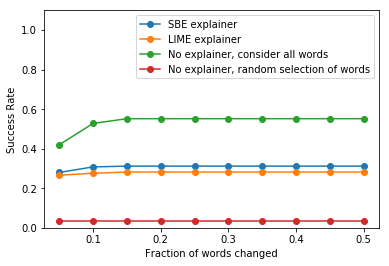

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.xlabel('Fraction of words changed')
plt.ylabel('Success Rate')
plt.ylim((0,1.1))
plt.plot(sbe_success_rates.keys(), sbe_success_rates.values(), marker='o', label = 'SBE explainer')
plt.plot(lime_success_rates.keys(), lime_success_rates.values(), marker='o', label = 'LIME explainer')
plt.plot(none_success_rates.keys(), none_success_rates.values(), marker='o', label = 'No explainer, consider all words')
plt.plot(random_success_rates.keys(), random_success_rates.values(), marker='o', label = 'No explainer, random selection of words')
plt.legend(loc='upper right')
if not os.path.exists('figures'):
    os.mkdir('figures')
plt.savefig('figures/glove300_treshold_05_plot.png', dpi=300)
plt.show()